# Time Series Forecasting - ETS

## Data Description
Electricity net generation measured in billions of kilowatt hours (kWh).

Source: US Energy Information Administration. http://data.is/zgRWCO.

## Summary

In this jupyter notebook the time series data will be analysed, transformed and decomposed. To forecast the last 2 years the ETS method will be used. Therefore the  transformed data will be split in train and test data to evaluate the result.

## Loading Data

In [1]:
library("forecast")
library("ggplot2")
library("fpp") # library provideds the data

data(usmelec)

Loading required package: fma
Loading required package: expsmooth
Loading required package: lmtest
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: tseries


## Data overview

In [2]:
summary(usmelec)
str(usmelec)
head(usmelec)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  139.6   192.6   252.5   254.1   307.0   421.8 

 Time-Series [1:454] from 1973 to 2011: 160 144 148 140 147 ...


         Jan     Feb     Mar     Apr     May     Jun
1973 160.218 143.539 148.158 139.589 147.395 161.244

## Plots

### Data Set

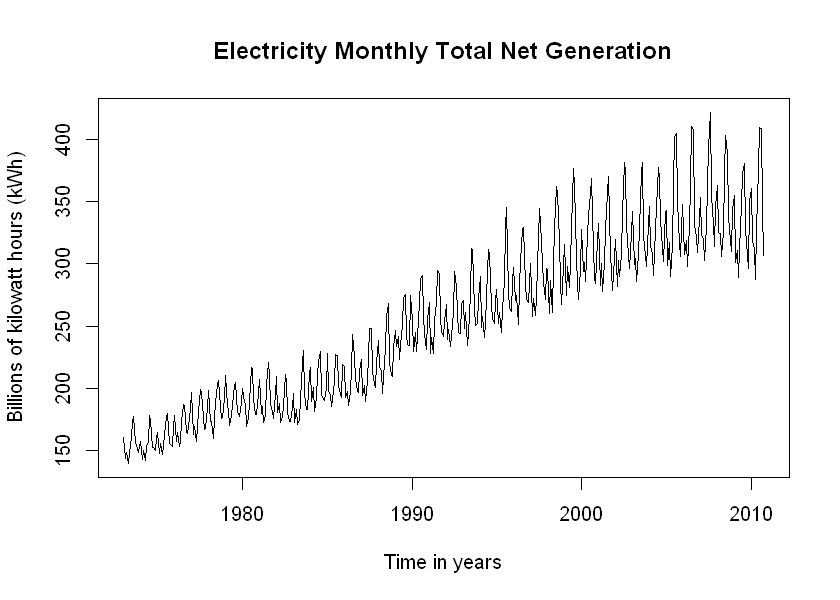

In [3]:
options(repr.plot.width=7, repr.plot.height=5 )
plot(usmelec, main = "Electricity Monthly Total Net Generation", 
     xlab="Time in years",ylab="Billions of kilowatt hours (kWh)")

### Data Set with Trend

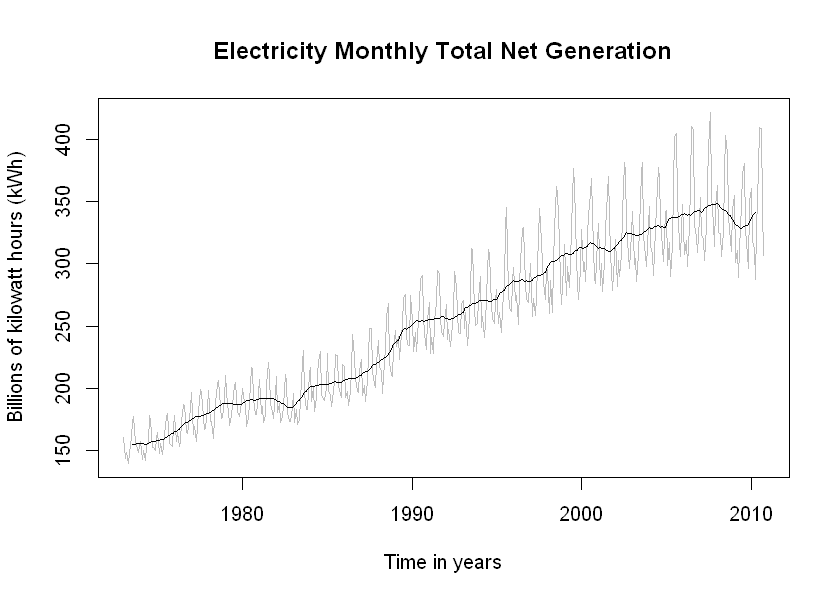

In [4]:
options(repr.plot.width=7, repr.plot.height=5 )
movAvg <- ma(usmelec, order=12)
plot(usmelec, col='gray', main="Electricity Monthly Total Net Generation",
     xlab="Time in years",ylab="Billions of kilowatt hours (kWh)")
lines(movAvg)

### Seasonal Plot

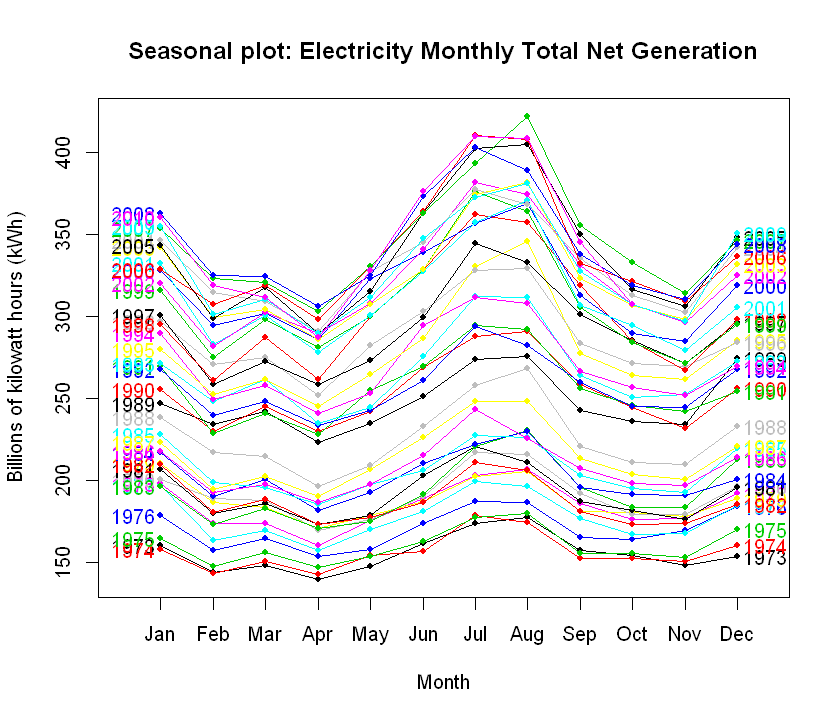

In [5]:
options(repr.plot.width=7, repr.plot.height=6 )
seasonplot(usmelec,main = "Seasonal plot: Electricity Monthly Total Net Generation",
           xlab="Month",ylab="Billions of kilowatt hours (kWh)",
           year.labels=TRUE, year.labels.left=TRUE, col=1:39, pch=20)

### Autocorrelation and Partial Autocorrelation

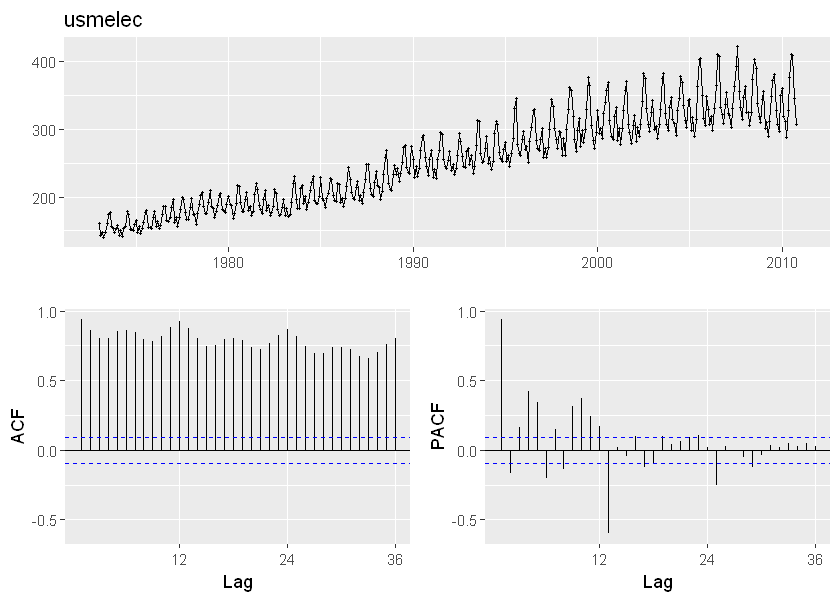

In [6]:
options(repr.plot.width=7, repr.plot.height=5 )
ggtsdisplay(usmelec)


### STL Decompostion

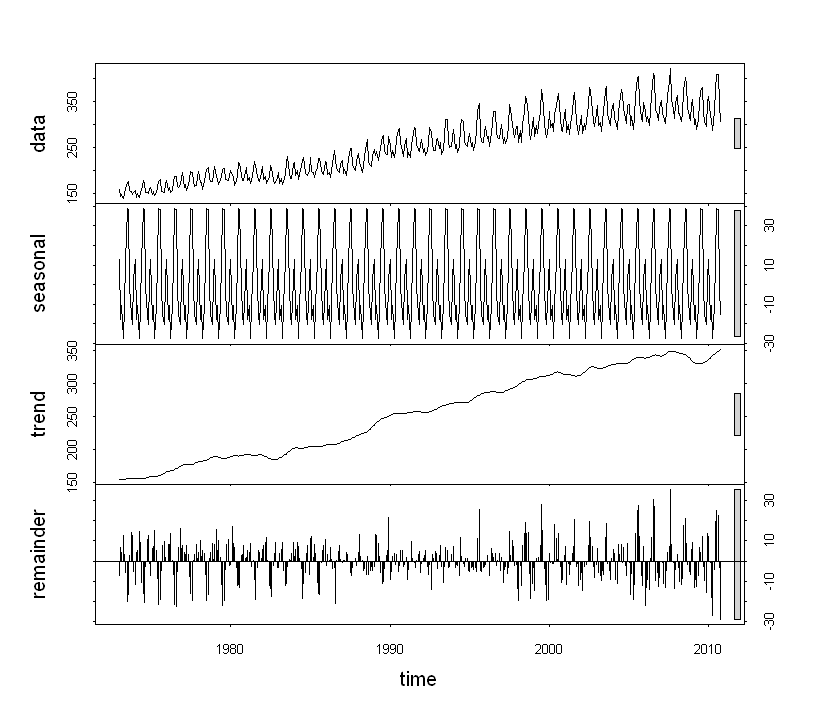

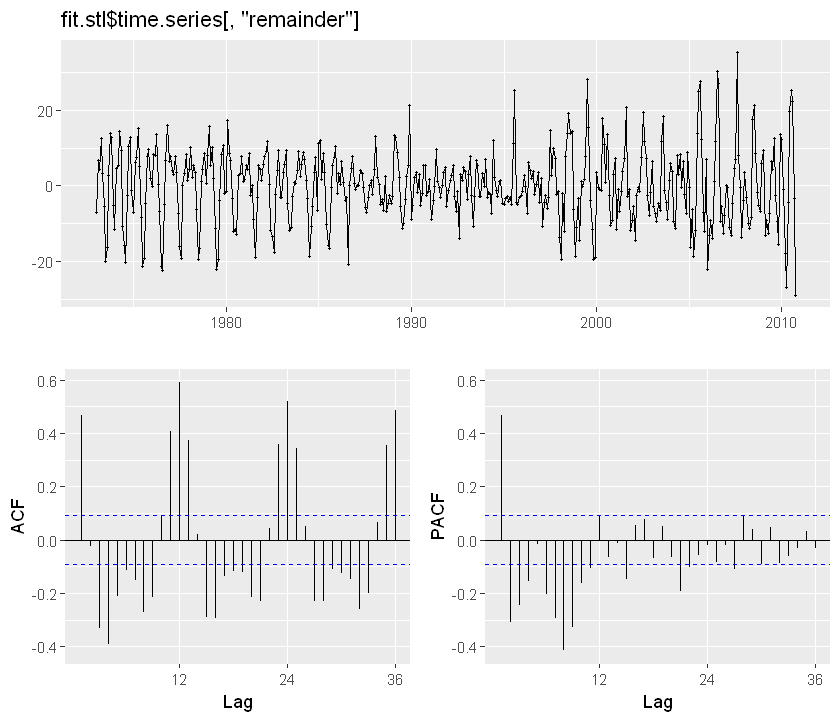

In [7]:
options(repr.plot.width=7, repr.plot.height=6)
fit.stl <- stl(usmelec, t.window=19, s.window="periodic")
plot(fit.stl)

ggtsdisplay(fit.stl$time.series[,"remainder"])

## Data Transformation

### Applying Logarithm

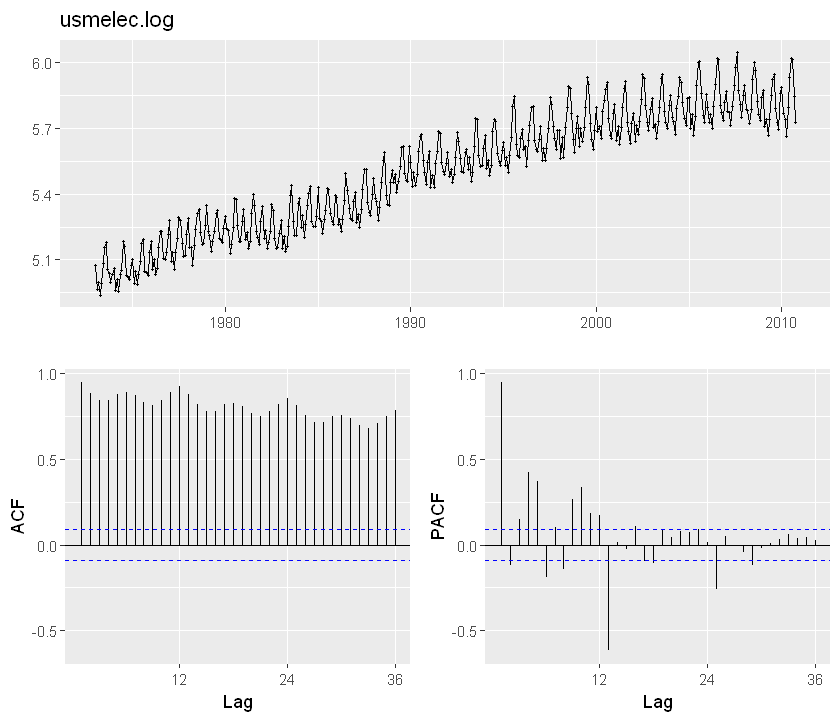

In [8]:
usmelec.log <- log(usmelec)
ggtsdisplay(usmelec.log)

### Applying Differencing

Warning message in adf.test(usmelec.tranf1):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  usmelec.tranf1
Dickey-Fuller = -5.0956, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary



	KPSS Test for Level Stationarity

data:  usmelec.tranf1
KPSS Level = 0.52745, Truncation lag parameter = 4, p-value = 0.03548


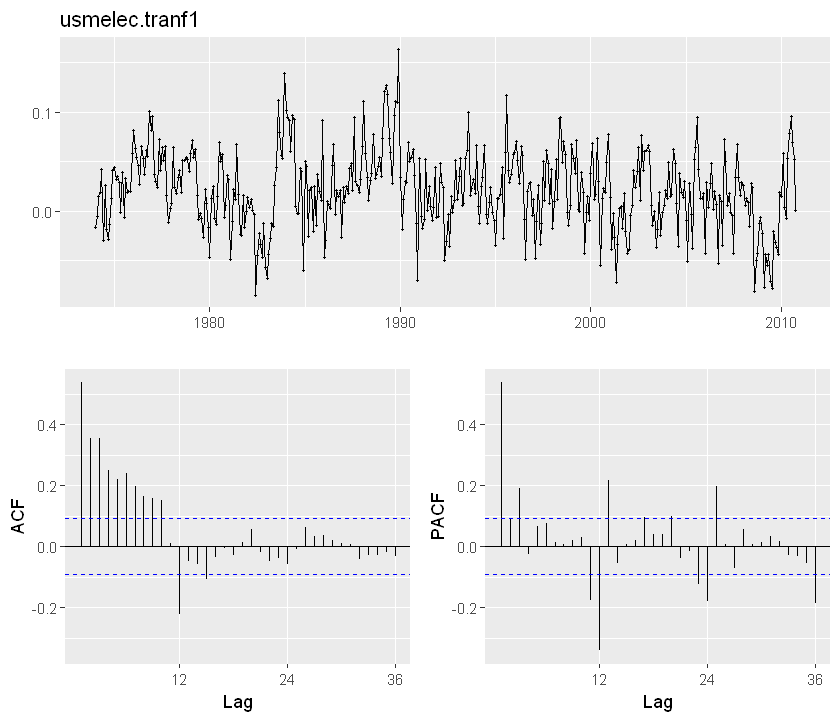

Warning message in adf.test(usmelec.tranf2):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  usmelec.tranf2
Dickey-Fuller = -12.062, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in kpss.test(usmelec.tranf2):
"p-value greater than printed p-value"


	KPSS Test for Level Stationarity

data:  usmelec.tranf2
KPSS Level = 0.019185, Truncation lag parameter = 4, p-value = 0.1


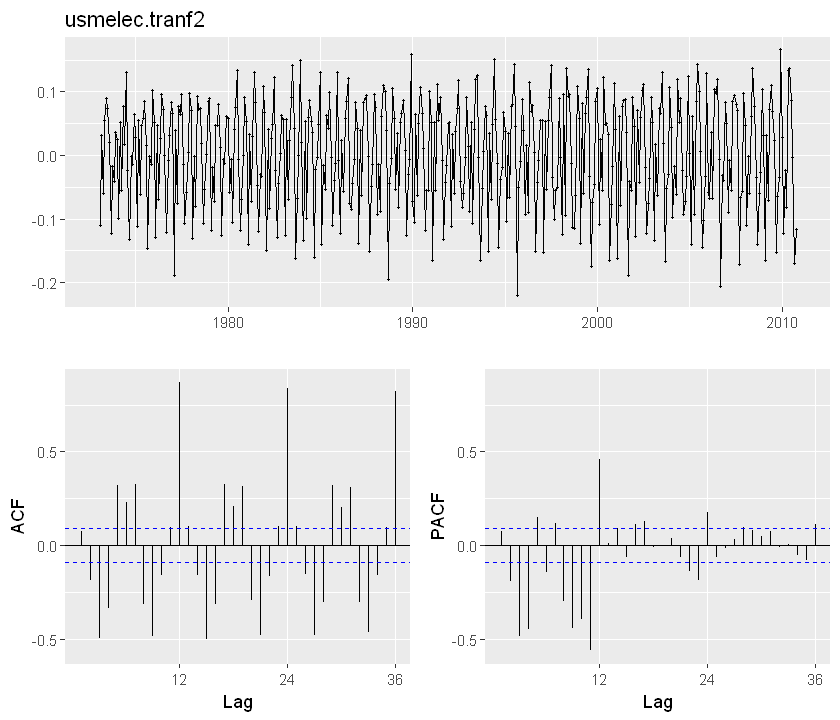

In [9]:
require(tseries)

# seasonal differencing
usmelec.tranf1 <- diff(log(usmelec),12)
ggtsdisplay(usmelec.tranf1)

# test for stationarity
adf.test(usmelec.tranf1)
kpss.test(usmelec.tranf1)

# differencing
usmelec.tranf2 <- diff(log(usmelec),1)
ggtsdisplay(usmelec.tranf2)

# test for stationarity
adf.test(usmelec.tranf2)
kpss.test(usmelec.tranf2)

#### STL Decomposition

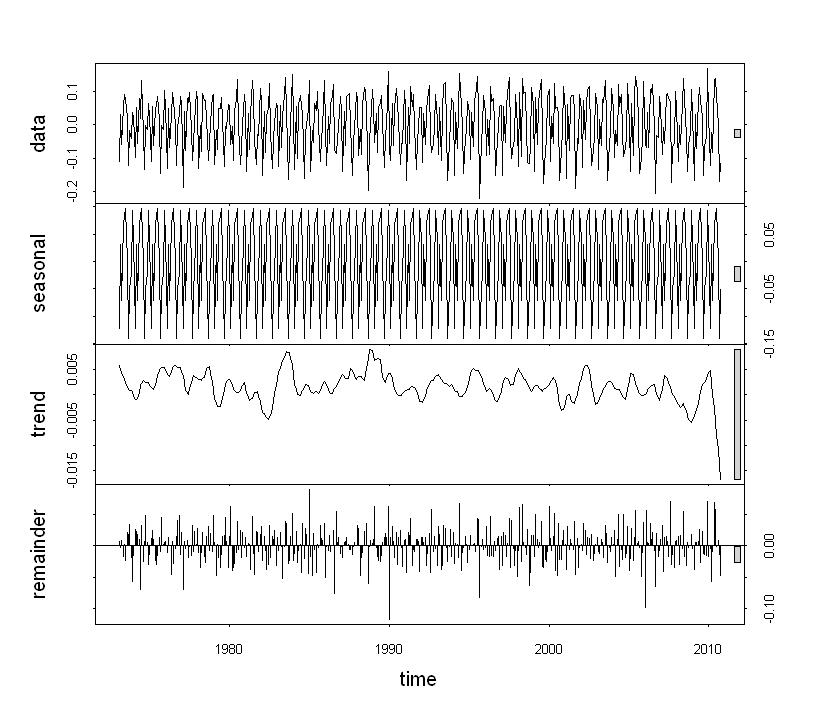

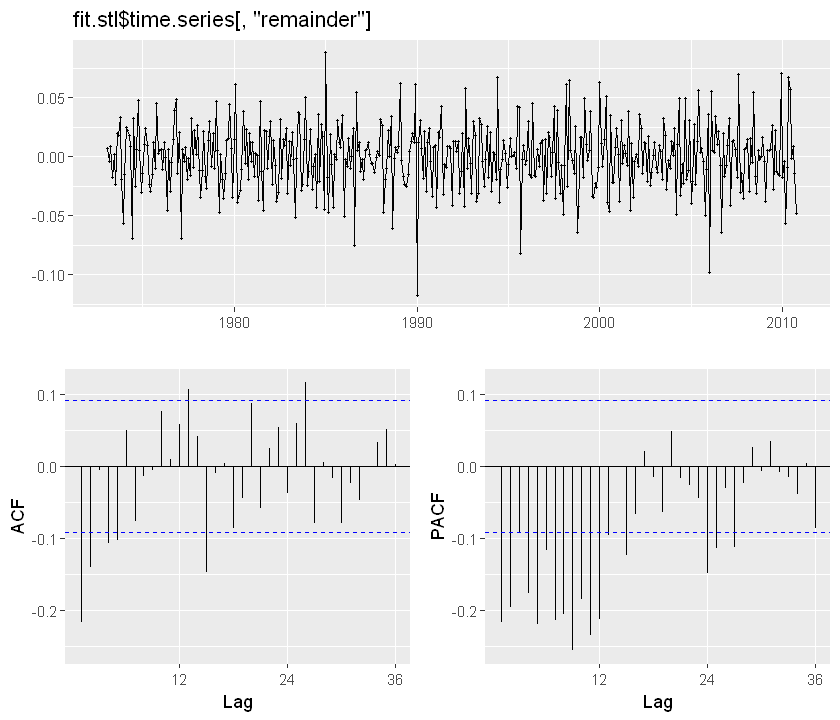

In [10]:
options(repr.plot.width=7, repr.plot.height=6)
#fit.stl <- stl(usmelec, t.window=19, s.window="periodic", robust=TRUE)
fit.stl <- stl(usmelec.tranf2, t.window=19, s.window="periodic")
plot(fit.stl)

ggtsdisplay(fit.stl$time.series[,"remainder"])

## Forecasting using ETS

### Data Spliting

In [11]:
usmelec.train <- window(usmelec.tranf2, 1973, 2008)
usmelec.test <- window(usmelec.tranf2, 2008, 2010)

Warning message in window.default(x, ...):
"'start' value not changed"

### Fully Automated Forecasting

In [12]:
fcast <- forecast(usmelec.train, h=24)
sprintf("The method selected for the data is: %s", fcast$method)

[1] "The method selected for the data is: ETS(A,N,A)"

### Result Plots

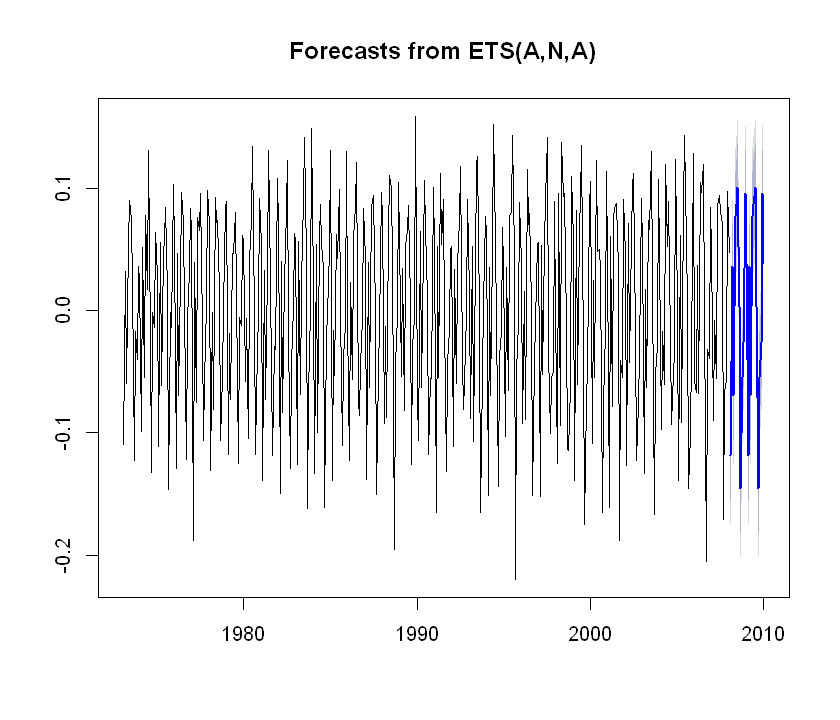

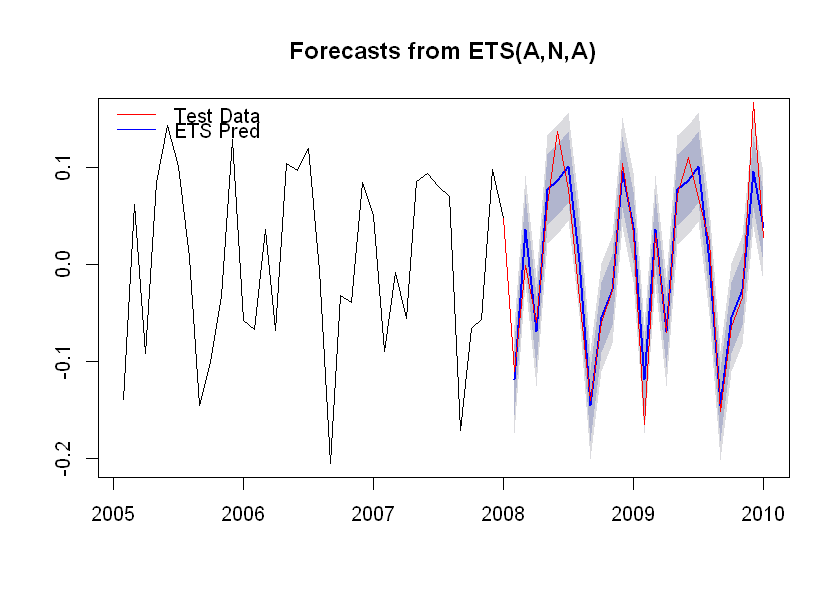

In [13]:
plot(fcast)

options(repr.plot.width=7, repr.plot.height=5)
plot(fcast, include = 36) #ylim=c(1.95,2)
lines(usmelec.test, col="red")
legend("topleft", lty=1,bty = "n", col=c("red","blue"),c("Test Data","ETS Pred"))